In [9]:
#Questions
#what are the top 5 movie genre based on total IMDB rating?
#What is the trend of the total rating of those top 5 genre?
#Importing needed packages
import pandas as pd
import os
import requests
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt



In [10]:
#loading the CSV file
movies=pd.read_csv(r"/Users/moussaberete/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Project1/Resources/MovieData_Clean.csv")


In [11]:
#Initial look on the data
movies.head()
movies.info()
movies.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 27 columns):
TMDB ID               2058 non-null int64
Title                 2058 non-null object
Release Date          2058 non-null object
Budget                2058 non-null float64
Revenue               2058 non-null float64
IMDB ID               2058 non-null object
Rating                1995 non-null object
Runtime               2055 non-null object
Genre                 2058 non-null object
Director              2055 non-null object
Writer                2031 non-null object
Actors                2056 non-null object
Plot                  2051 non-null object
Language              2058 non-null object
Country               2058 non-null object
Awards                1875 non-null object
Poster                2051 non-null object
IMDB Rating           2050 non-null float64
IMDB Votes            2050 non-null object
DVD Release Date      1937 non-null object
Production            1977 non-

,TMDB ID,Budget,Revenue,IMDB Rating,Year of Release,Revenue (Millions),Runtime (Min)
count,2058.000000,2.058000e+03,2.058000e+03,2050.000000,2058.000000,2058.000000,2055.000000
mean,168852.050534,4.137708e+07,1.334732e+08,6.473366,2013.009232,133.473192,108.349392
std,146481.268882,5.223099e+07,2.298362e+08,0.973957,3.125539,229.836175,18.553210
min,155.000000,0.000000e+00,1.777043e+06,1.400000,2008.000000,1.777043,3.000000
25%,39303.250000,6.000000e+06,1.302367e+07,5.900000,2010.000000,13.023666,96.000000
50%,109502.000000,2.275000e+07,4.634611e+07,6.500000,2013.000000,46.346106,106.000000
75%,293977.750000,5.000000e+07,1.460240e+08,7.200000,2016.000000,146.024006,118.000000
max,597185.000000,3.800000e+08,2.787965e+09,9.000000,2018.000000,2787.965087,212.000000


In [12]:
#Grouping the data by genre by total IMDB rating 
category = movies.groupby('Primary Genre', as_index=False).agg({"IMDB Rating": "sum"})
category.head()


,Primary Genre,IMDB Rating
0,Action,3502.6
1,Adventure,684.9
2,Animation,1046.2
3,Biography,1228.9
4,Comedy,2879.8


In [13]:
#Selecting the top 5 overall genre
top5 = category.nlargest(5, "IMDB Rating")
print(top5)

  Primary Genre  IMDB Rating
0        Action       3502.6
4        Comedy       2879.8
7         Drama       2227.5
3     Biography       1228.9
2     Animation       1046.2


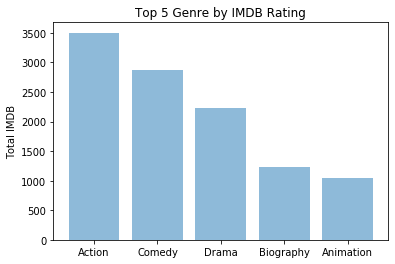

In [14]:
#Plotting the top 5 
objects = top5['Primary Genre']
x = np.arange(len(objects))
y = top5['IMDB Rating']
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, objects)
plt.ylabel('Total IMDB')
plt.title('Top 5 Genre by IMDB Rating')
plt.show()

In [15]:
top5genre=movies.loc[(movies['Primary Genre']== 'Action')|(movies['Primary Genre']== 'Drama')|(movies['Primary Genre']== 'Comedy')|(movies['Primary Genre']== 'Biography')|(movies['Primary Genre']== 'Animation')]


Text(0.04, 0.5, 'Total IMDB Rating')

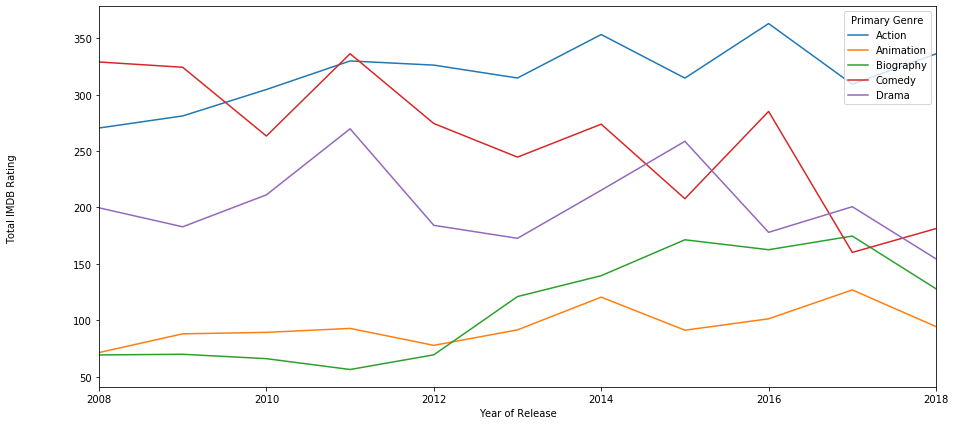

In [17]:
#Ploting the trend of the top 5 genre based on Total IMDB Rating.
fig, ax = plt.subplots(figsize=(15,7))
top5genre.groupby(['Year of Release', 'Primary Genre']).sum()['IMDB Rating'].unstack().plot(ax=ax)
fig.text(0.04, 0.5, 'Total IMDB Rating', va='center', rotation='vertical')